In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import scipy.integrate as si
import numpy.linalg as npla



import pandas as pd
from scipy.sparse.csc import csc_matrix

In [16]:
#Wigner/Husini function implementation
#Particle on ring Dimensionless


#variables
Omeg0=1.0
Omeg1=1.0
eps=0.0
ntild=10#ntild = 1 is quantum, ntild>>1 is classical
dt=0.01
nsteps=300
isteps=300

t0=0
theta0=0#+0.1
thetamin=-np.pi
thetamax=np.pi
k=1j

#dependent variables
dtheta=(2*thetamax)/isteps
sigma=0.5

#initial arrays 
theta=np.zeros(isteps)
drv=np.zeros(nsteps+1)
t=np.zeros(nsteps+1)
   
for n in range(nsteps+1):#t,drv array, drv is drive force
    tn=t0+(n)*dt
    t[n]=tn
    drvn=np.cos(Omeg1*tn)
    drv[n]=drvn

T=np.zeros(isteps,np.complex)#wave packet array

for i in range(0,isteps):#theta,initial wave packet array T
    thetai=thetamin+(i)*dtheta
    theta[i]=thetai
    Ti=np.exp((-0.0*k*thetai)+(-1)*((thetai-theta0)**2)/(sigma)**2)
    T[i]=Ti
    
#probibility here, to normalize
Total=np.sum(np.abs(T)**2)*dtheta
T=T/(np.sqrt(Total))
#make array of arrays of T
Tn=[]
Tn.append(T)

#definitions of coeffients
def a(drv,theta):
    a1=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return a1
def b(drv,theta):
    b1=((k/(Omeg0*dt))+(1/(ntild*2*(dtheta)**2))+((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n])**2/4)-(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b1 
def c(drv,theta):
    c1=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n])/(dtheta)))
    return c1

def a_1(drv,theta):
    a_11=((1/(ntild*2*2*(dtheta)**2))-((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return a_11
def b_1(drv,theta):
    b_11=((k/(Omeg0*dt))-(1/(ntild*2*(dtheta)**2))-((eps**2)/2+(Omeg0**2)/(Omeg1**2)*ntild*(drv[n+1])**2/4)+(ntild*np.cos(theta)/2))#cos has flipped signs, fix this and correct the potential
    return b_11
def c_1(drv,theta):
    c_11=((1/(ntild*2*2*(dtheta)**2))+((k*eps*(Omeg0/Omeg1)*drv[n+1])/(dtheta)))
    return c_11

def CrankNicolson(T,n):#Crank nicolson solver with periodic boundary conditions
    RHS=np.zeros(isteps,np.complex)#RHS
    for i in range(-1,isteps-1):
        temp1=-a(drv,theta[i])
        temp2=b(drv,theta[i])
        temp3=-c(drv,theta[i])
        RHS[i]=temp1*T[i+1]+temp2*T[i]+temp3*T[i-1]
    D=np.matrix(RHS).T#made matrix for the RHS
    d=np.zeros((isteps,isteps),np.complex)#LHS
    for i in range(-1,isteps-1):
        d[i,i]=b_1(drv,theta[i])
        d[i,i+1]=a_1(drv,theta[i])
        d[i,i-1]=c_1(drv,theta[i])
    d=np.matrix(d)#made matrix for LHS
    dD= np.matrix(d)*np.matrix(D)
    #I=npla.inv(d)#matrix inversion using linear algebra 
    #T1=I*D
    #T1=np.array(T1.T)[0]#add to array of T
    T1=scipy.linalg.solve_banded((150,149),dD,d)
    return T1

#plt.plot(theta,np.real(T))# plots initial condition
#Run for all t
for n in range(nsteps):#Plots real parts                                                                  
    T=CrankNicolson(T,n)
    Tn.append(T)
 #   plt.plot(theta,np.real(T))
    
#plt.show() 

#for T in Tn:#Plots imaginary parts
  #  plt.plot(theta,np.imag(T))

#plt.show()

#for T in Tn:#plots overall average
   # plt.plot(theta,np.abs(T)**2)
   #print(np.sum(np.abs(T)**2)*dtheta)#checking for unitarity

for n in range(0,nsteps,10):
    plt.plot(theta,np.abs(Tn[n])**2)

plt.show()

#Expecatation values

def position(theta,T):#calculates expectation value
    TA=0.
    for i in range(isteps):
        TA=TA+theta[i]*(np.abs(T[i])**2)*dtheta
    return TA

xbar=np.zeros(nsteps+1)
for n in range(nsteps+1):
    xbar[n]=np.real(position(theta,Tn[n]))
    
print(xbar[0])
plt.plot(t,xbar)
plt.show()

#angular momentum value, this works as long as Omeg0=1, which it does
Exp_momentum=np.zeros((nsteps+1,2),np.complex)
def momentum(T):#calculates expectation value
    P=0.
    for i in range(-1,isteps-1):
        P=P+(1)*(-k)*(Omeg0/ntild)*np.conj(T[i])*((T[i+1]-T[i-1])/(2*dtheta))*dtheta
    return(P)

pbar=np.zeros((nsteps+1),np.complex)
#
for n in range(nsteps+1):
    pbar[n]=np.real(momentum(Tn[n]))
    Exp_momentum[n,0]=t[n]#time
    Exp_momentum[n,1]=momentum(Tn[n])#expectation value of momentum

Exp_momentum=np.matrix(Exp_momentum)#table showing time and expectation value
print(pbar)
plt.plot(t,pbar)
plt.show()

print(T)

print(len(theta))

ValueError: shapes of ab and b are not compatible.

300
(5.746446561913872e-17+0j)
300
(300, 300, 300)
[-5.74644656e-17+0.j -5.70800879e-17+0.j -5.66957102e-17+0.j
 -5.63113325e-17+0.j -5.59269548e-17+0.j -5.55425771e-17+0.j
 -5.51581994e-17+0.j -5.47738217e-17+0.j -5.43894440e-17+0.j
 -5.40050664e-17+0.j -5.36206887e-17+0.j -5.32363110e-17+0.j
 -5.28519333e-17+0.j -5.24675556e-17+0.j -5.20831779e-17+0.j
 -5.16988002e-17+0.j -5.13144225e-17+0.j -5.09300448e-17+0.j
 -5.05456671e-17+0.j -5.01612894e-17+0.j -4.97769117e-17+0.j
 -4.93925340e-17+0.j -4.90081563e-17+0.j -4.86237786e-17+0.j
 -4.82394009e-17+0.j -4.78550232e-17+0.j -4.74706455e-17+0.j
 -4.70862678e-17+0.j -4.67018901e-17+0.j -4.63175124e-17+0.j
 -4.59331347e-17+0.j -4.55487570e-17+0.j -4.51643793e-17+0.j
 -4.47800016e-17+0.j -4.43956239e-17+0.j -4.40112462e-17+0.j
 -4.36268685e-17+0.j -4.32424909e-17+0.j -4.28581132e-17+0.j
 -4.24737355e-17+0.j -4.20893578e-17+0.j -4.17049801e-17+0.j
 -4.13206024e-17+0.j -4.09362247e-17+0.j -4.05518470e-17+0.j
 -4.01674693e-17+0.j -3.97830916e-

[[-4.36811163e-11+5.91620727e-11j -4.36763263e-11+5.91555853e-11j
  -4.36619598e-11+5.91361270e-11j ... -2.74964522e-15+3.72414270e-15j
  -2.57596144e-15+3.48890393e-15j -2.41271933e-15+3.26780744e-15j]
 [-4.36759373e-11+5.95022100e-11j -4.36807592e-11+5.95087791e-11j
  -4.36760013e-11+5.95022973e-11j ... -2.93500914e-15+3.99852965e-15j
  -2.75022183e-15+3.74678340e-15j -2.57650352e-15+3.51011709e-15j]
 [-4.36441214e-11+6.05210138e-11j -4.36585461e-11+6.05410165e-11j
  -4.36633981e-11+6.05477448e-11j ... -3.13095821e-15+4.34167900e-15j
  -2.93447969e-15+4.06922354e-15j -2.74972773e-15+3.81302922e-15j]
 ...
 [-2.57185132e-15+3.67486394e-15j -2.74525394e-15+3.92263528e-15j
  -2.92970531e-15+4.18619393e-15j ... -4.35876418e-11+6.22814592e-11j
  -4.35923580e-11+6.22881981e-11j -4.35875139e-11+6.22812765e-11j]
 [-2.41173317e-15+3.34444198e-15j -2.57490667e-15+3.57072087e-15j
  -2.74851731e-15+3.81147333e-15j ... -4.36346065e-11+6.05097659e-11j
  -4.36489321e-11+6.05296317e-11j -4.36536869e-

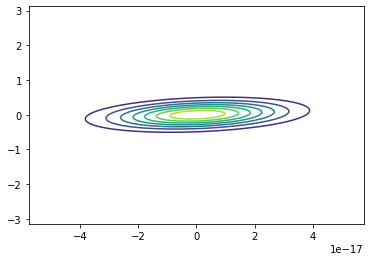

In [3]:
print(len(theta))
print(max(pbar))
omega=np.linspace(-max(pbar),max(pbar),len(theta))
theta=theta
r=np.linspace(-np.pi,np.pi,len(theta))

#print(omega)
print(len(theta))
#psi=CrankNicolson(T,n)

dr=1

omega1,theta1,r1=np.meshgrid(omega,theta,r)
omega2,theta2=np.meshgrid(omega,theta)
#theta3,x3=np.meshgrid(theta,x)
#print(x1,y1)
#print(x,y)

isteps=len(omega)
jsteps=len(theta)

def Husimi(omega0,theta0,r0):
    return T*np.exp((k*ntild*omega0*r)-(((theta0-r0)**2)/(4*(dr**4))))

func=Husimi(omega1,theta1,r1)

print(func.shape)
print(omega)
print(theta)
#plt.plot(z)
#plt.show()

#plt.contour(x1,y1,z)
#plt.show()


#print(x[0])
#print(z)
print(omega.shape)
print(theta.shape)
#print(z.shape)


Int=np.zeros((isteps,jsteps),np.complex)
for i in range(isteps):
    for j in range(jsteps):
        Int[i,j]=si.simps(func[j,:,i],r)#,np.pi/2,-1,'avg')
        
print(Int)
print(Int.shape)
print(omega2.shape)

plt.contour(np.real(omega2),np.real(theta2),np.abs(Int)**2)#blue
plt.show()



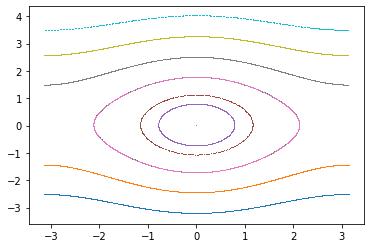

In [4]:
#variables in the classical scheme
tn=0
xn=0# Theta initial
vn=0# Omega/ angular velocity initial
nsteps=1000000
v=np.zeros(nsteps)
x=np.zeros(nsteps)
t=np.zeros(nsteps)
isteps=10# number of initial conditions we need
i=1+isteps
V=[]
X=[]
T=[]

def Verlet(tn,xn,vn,dt):#velocity verlet algorithim
    tn1=tn+dt
    an=(-Omeg0**2)*math.sin(xn)+eps*math.sin(Omeg1*tn)
    xn1=xn+vn*dt+(1/2)*an*dt**2# position
    an1=(-Omeg0**2)*math.sin(xn1)+eps*math.sin(Omeg1*tn1)# acceleration
    vn1=vn+(1/2)*(an+an1)*dt# velocity
    return tn1,xn1,vn1

ICsP=int((2*np.pi)/(dt*Omeg1))
Max=nsteps-ICsP

for i in range(10):
    P_X=np.zeros(nsteps)#Max-ICsP)
    P_V=np.zeros(nsteps)#Max-ICsP)
    tn=0
    xn=(np.pi/4)#*i
    vn=(np.pi/4)*(i-4)
    for n in range(nsteps):#looping verlet to get values
        tn, xn, vn = Verlet(tn,xn,vn,dt)
        x[n]=xn
        v[n]=vn
        t[n]=tn
    X.append(x)
    V.append(v)
    T.append(t)
    for j in range(ICsP,Max,ICsP): # turn this loop into the POINCARE SURFACES
        P_X[j-ICsP] = X[i][j]
        P_V[j-ICsP] = V[i][j]
        P_X=((P_X+np.pi)%(2*np.pi))-np.pi
    plt.plot(P_X,P_V,',')
plt.show()
